In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

### 데이터 읽어오기

In [3]:
h_stock = pd.read_csv(".\\H_stock.csv", encoding='utf-8')#h회사의 주가지수
s_stock = pd.read_csv(".\\S_stock.csv", encoding='utf-8')#s회가의 주가지수
k_index = pd.read_csv(".\\K_index.csv", encoding='utf-8') #코스피 지수

In [4]:
h_stock #시계열 데이터이지만 회귀분석을 진행할 예정

,date,h_price,h_rate
0,2015-03-25,45500,NaN
1,2015-03-26,45900,0.879
2,2015-03-27,45000,-1.961
3,2015-03-30,45600,1.333
4,2015-03-31,46000,0.877
...,...,...,...
244,2016-03-21,60100,0.839
245,2016-03-22,59200,-1.498
246,2016-03-23,58900,-0.507
247,2016-03-24,59300,0.679


### 헤더정보를 제거함

In [56]:
# h_stock만 출력하면(248,3)   [0:] -> [nan,  0.879 , -1.961]
h_rate = np.array(h_stock.h_rate[1:])
s_rate = np.array(s_stock.s_rate[1:])
k_rate = np.array(k_index.k_rate[1:])

print(h_rate)
print(h_rate.shape)

[ 0.879 -1.961  1.333  0.877 -0.109  0.762  0.756 -1.929 -0.874 -3.638
 -1.373  1.276 -0.802  1.386 -0.228  5.023  3.37  -2.734 -0.432 -1.194
  0.659  2.293  0.32   2.021 -0.521 -1.782  2.348 -2.92  -0.644 -0.973
  2.183  0.641  0.212 -0.847  0.    -0.214 -1.285  3.905 -0.939  2.213
 -3.093 -2.66  -0.109  1.094 -1.515  0.769 -1.2   -1.766  0.674  0.
 -0.223 -2.237  0.343 -0.798  0.69  -1.826 -0.698 -0.585  3.887  4.762
 -0.325 -1.303 -0.77   0.222 -0.885  2.232  1.201  0.539  0.644  0.213
 -0.957  1.504  1.693 -1.353  1.266  2.083  0.102 -0.306  0.307  1.733
  1.002 -3.472  2.261 -3.216 -1.038  1.154  0.622  0.206  4.733  2.554
 -0.958 -0.193 -0.969 -0.196  0.588 -1.949 -0.994 -0.402  1.815  0.594
 -0.394  2.174 -4.255 -3.636 -0.419  3.474  0.712 -0.606 -2.439  1.042
 -1.753 -0.315 -1.579  1.176 -2.114  2.916  3.358 -2.437  1.249  0.
  0.103 -2.156 -0.315 -0.211  4.852 -2.817  1.035  0.512 -0.102  0.
 -1.531  1.451  0.511 -1.728  0.    -0.207  0.104  3.416  1.301  1.581
  0.778  0.965 

### 선형회귀모델함수에 넣기 위하여 reshape으로 차원조정
- 예: (248, ) -> (248,1)

In [57]:
# shape 참고 사이트('https://barambunda.tistory.com/11')
h_rate = h_rate.reshape(h_rate.shape[0],1) 
s_rate = s_rate.reshape(s_rate.shape[0],1) 
k_rate = k_rate.reshape(k_rate.shape[0],1) 

print(h_rate)

[[ 0.879]
 [-1.961]
 [ 1.333]
 [ 0.877]
 [-0.109]
 [ 0.762]
 [ 0.756]
 [-1.929]
 [-0.874]
 [-3.638]
 [-1.373]
 [ 1.276]
 [-0.802]
 [ 1.386]
 [-0.228]
 [ 5.023]
 [ 3.37 ]
 [-2.734]
 [-0.432]
 [-1.194]
 [ 0.659]
 [ 2.293]
 [ 0.32 ]
 [ 2.021]
 [-0.521]
 [-1.782]
 [ 2.348]
 [-2.92 ]
 [-0.644]
 [-0.973]
 [ 2.183]
 [ 0.641]
 [ 0.212]
 [-0.847]
 [ 0.   ]
 [-0.214]
 [-1.285]
 [ 3.905]
 [-0.939]
 [ 2.213]
 [-3.093]
 [-2.66 ]
 [-0.109]
 [ 1.094]
 [-1.515]
 [ 0.769]
 [-1.2  ]
 [-1.766]
 [ 0.674]
 [ 0.   ]
 [-0.223]
 [-2.237]
 [ 0.343]
 [-0.798]
 [ 0.69 ]
 [-1.826]
 [-0.698]
 [-0.585]
 [ 3.887]
 [ 4.762]
 [-0.325]
 [-1.303]
 [-0.77 ]
 [ 0.222]
 [-0.885]
 [ 2.232]
 [ 1.201]
 [ 0.539]
 [ 0.644]
 [ 0.213]
 [-0.957]
 [ 1.504]
 [ 1.693]
 [-1.353]
 [ 1.266]
 [ 2.083]
 [ 0.102]
 [-0.306]
 [ 0.307]
 [ 1.733]
 [ 1.002]
 [-3.472]
 [ 2.261]
 [-3.216]
 [-1.038]
 [ 1.154]
 [ 0.622]
 [ 0.206]
 [ 4.733]
 [ 2.554]
 [-0.958]
 [-0.193]
 [-0.969]
 [-0.196]
 [ 0.588]
 [-1.949]
 [-0.994]
 [-0.402]
 [ 1.815]
 [ 0.594]


기울기 :  [[0.63482159]]
절편 :  [0.12628453]
결정계수 :  0.10645714237595238


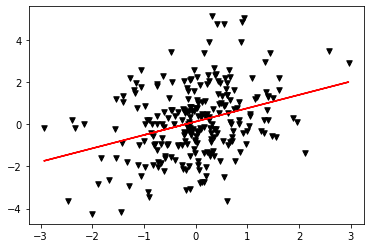

In [58]:
plt.scatter(k_rate, h_rate, c='black', s=30, marker='v',label='train')

#모델 만들기
model = linear_model.LinearRegression() #함수를 만들어준다

#모델 훈련 시키기
model.fit(k_rate, h_rate)# k_rate가 변할 때 h_rate가 어떻게 변하는지
                         # K_rate 독립변수, h_rate 종속변수

plt.plot(k_rate, model.predict(k_rate), linestyle='-',label='h stock' , c='red')

print('기울기 : ' , model.coef_) # 회귀분석의 기울기는 매우 중요함
print('절편 : ' , model.intercept_) 
print('결정계수 : ' , model.score(k_rate, h_rate)) #회귀분석 모델의 설명력을 의미한다

#### 인사이트
- 기울기가 0.6이으로 가파르게 상승하고 있는 것을 알 수 있다
- 코스피 지수와 h회사의 주가지수는 서로 63%의 영향력을 주고 받는다

기울기 :  [[1.00132771]]
절편 :  [-0.03500143]
결정계수 :  0.2644483831226937


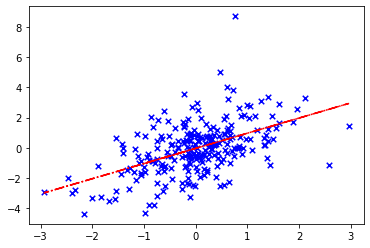

In [59]:
plt.scatter(k_rate, s_rate, c='blue', s=30, marker='x',label='s rate')

model = linear_model.LinearRegression()
model.fit(k_rate,s_rate)

plt.plot(k_rate, model.predict(k_rate), linestyle='-.',label='h stock' , c='red')

print('기울기 : ' , model.coef_) 
print('절편 : ' , model.intercept_) 
print('결정계수 : ' , model.score(k_rate, s_rate))

#### 인사이트
- 기울기가 1로 h사의 기울기 보다 가파르게 상승한다
- 코스피 지수가 s사회에 주가지수에 미치는 영향력이 더 크다 
    - 코스피 지수가 조금만 올라가도 주가가 크게 오른다
    - 배타지수가 크면 공격성향이 큰 주가로 판단된다
- 결정계수가 낮아서 모델로는 적합하지 않다